# Task 6 - Prediction using Decision Tree Algorithm

***Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view***

***Problem Statement :***

<img src="Screenshot 2023-03-30 114617.png" width="500">

### Import all the Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

### Load the dataset and understand data

In [2]:
data = pd.read_csv('iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# shape of the dataset

data.shape

(150, 6)

In [5]:
# remove the irrelevant  columns

data.drop('Id', axis = 1, inplace = True)

In [6]:
data.shape

(150, 5)

In [7]:
# chek information of the data 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Getting some Statistical Inference from the Data

In [8]:
# Dataset Statistical Summary

data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Checking for Null Values

In [9]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

***Objectives :***

- No Null Values present in this dataset

In [10]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
#Checking columns count of "Species"

data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Data Visualization

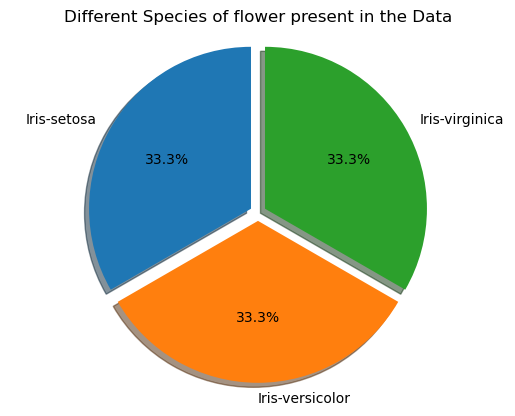

In [12]:
# piechart

value = data['Species'].value_counts()
label = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
     
exp = (0.05,0.05,0.05)
fig,ax = plt.subplots()
ax.pie(value, explode = exp, labels = label, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.title("Different Species of flower present in the Data")
ax.axis('equal')
plt.show()

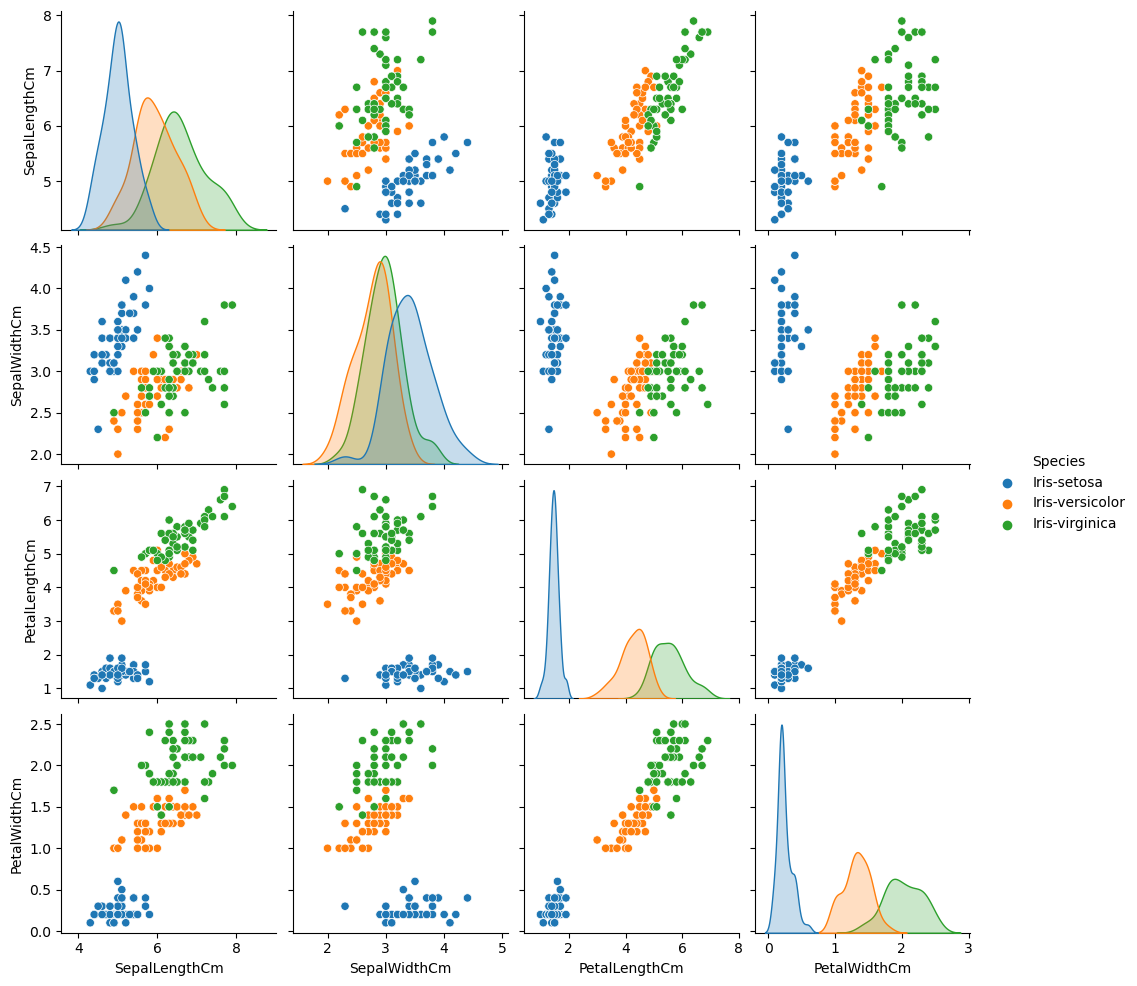

In [13]:
# pairplot

sns.pairplot(data = data, hue = 'Species')

In [14]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

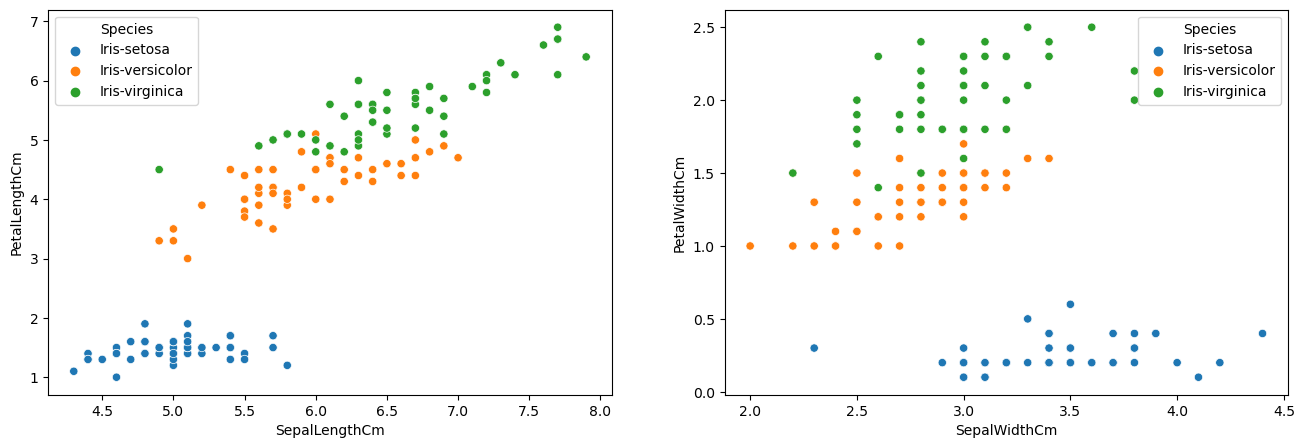

In [15]:
# scatterplot

plt.subplots(1, 2, figsize = (16, 5))

plt.subplot(121)
sns.scatterplot(x = 'SepalLengthCm', y = 'PetalLengthCm', data = data, hue = 'Species')

plt.subplot(122)
sns.scatterplot(x = 'SepalWidthCm', y = 'PetalWidthCm', data = data, hue = 'Species')

<Axes: xlabel='PetalWidthCm', ylabel='Species'>

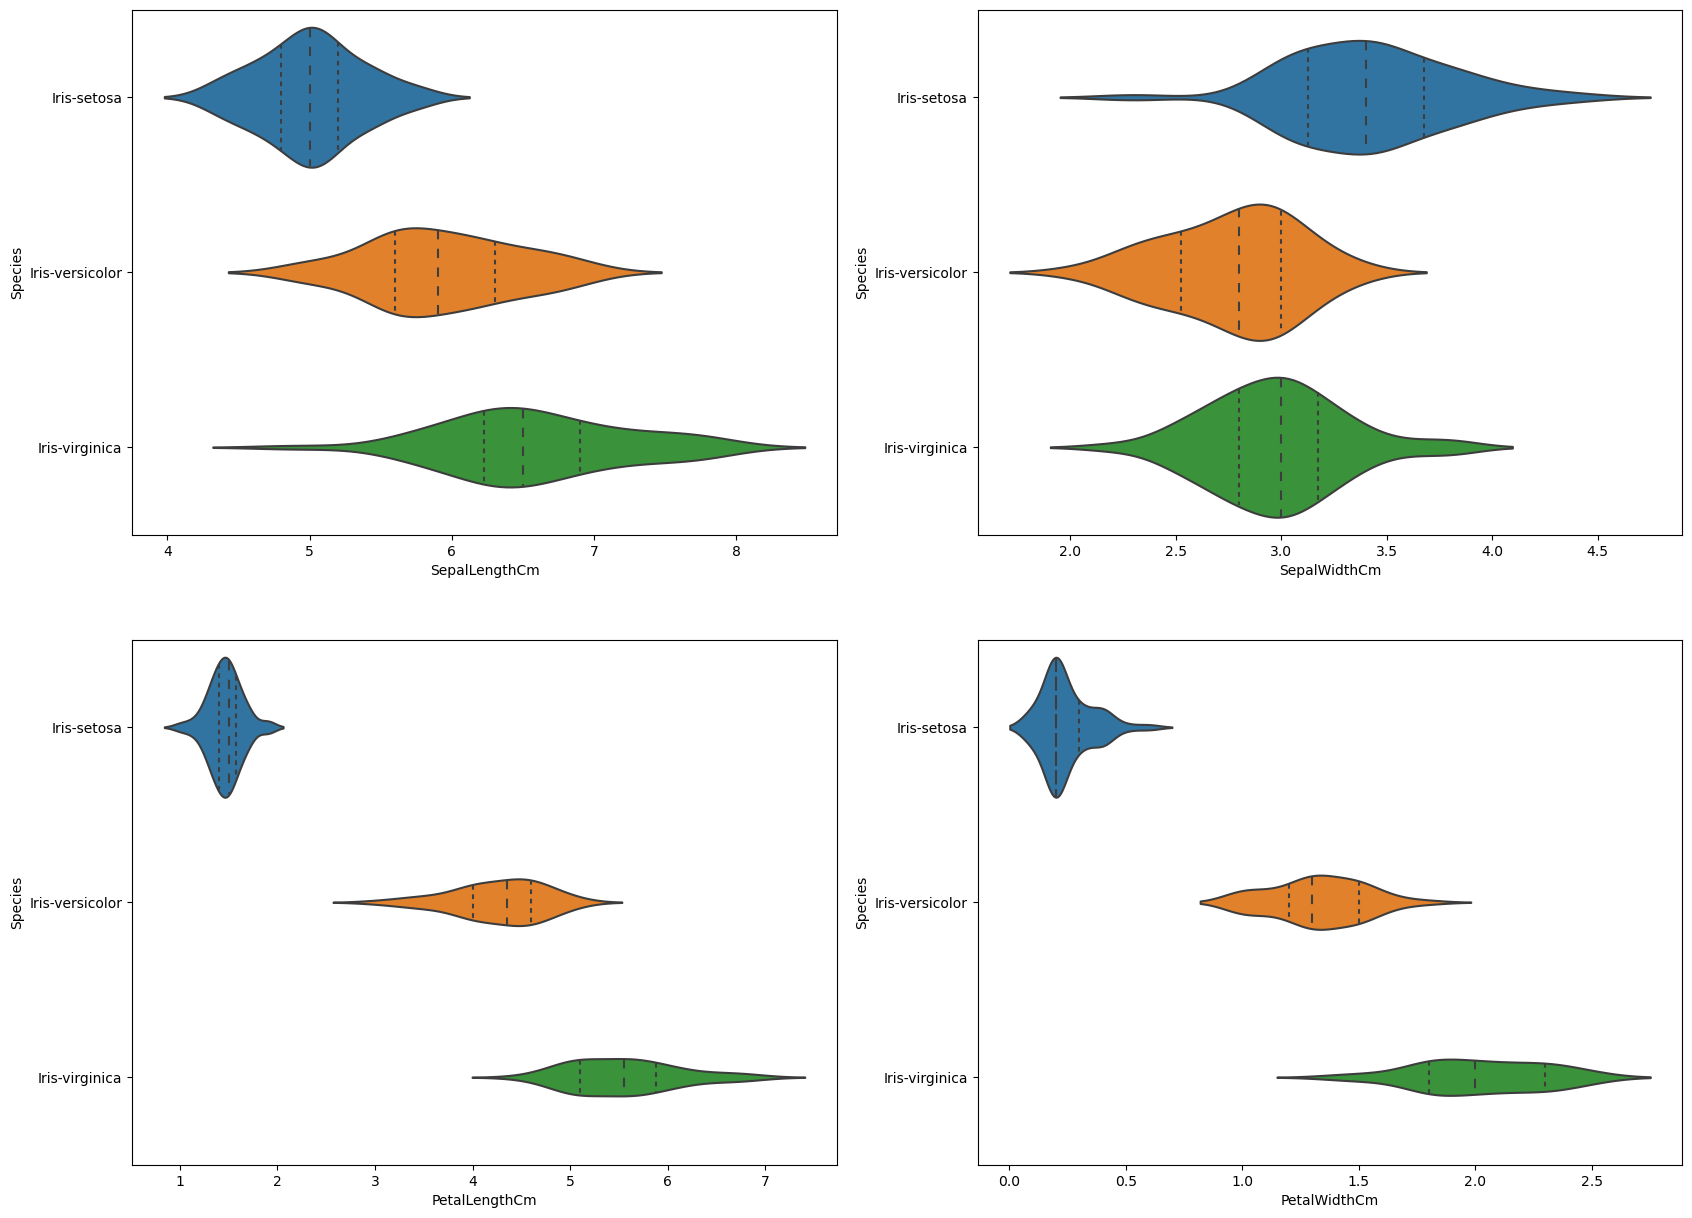

In [16]:
# violin plot

plt.subplots(2, 2, figsize = (20, 15))

plt.subplot(221)
sns.violinplot(y = 'Species', x = 'SepalLengthCm', data = data, inner = 'quartile')

plt.subplot(222)
sns.violinplot(y = 'Species', x = 'SepalWidthCm', data = data, inner = 'quartile')

plt.subplot(223)
sns.violinplot(y = 'Species', x = 'PetalLengthCm', data = data, inner = 'quartile')

plt.subplot(224)
sns.violinplot(y = 'Species', x = 'PetalWidthCm', data = data, inner = 'quartile')

<Axes: >

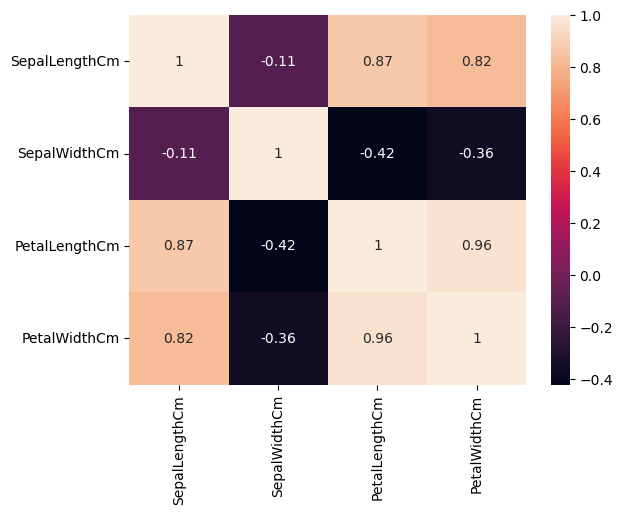

In [17]:
# heatmap

corr = data.corr()

sns.heatmap(corr, annot = True)

### Data Preprocessing

In [18]:
x = data.drop('Species', axis = 1)
y = data['Species']

In [19]:
# feature scaling

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [20]:
# split the data into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 1)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

### Build the DecisionTree Model

In [22]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [23]:
# predict value

pred = model.predict(x_test)

### Model Evaluations

In [24]:
acc = accuracy_score(y_test, pred)
print("The Accuracy of the Decision Tree Algorithms is : ", str(acc*100) + "%")

The Accuracy of the Decision Tree Algorithms is :  95.55555555555556%


In [25]:
confusion_matrix(y_test, pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [26]:
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



### Visulizing the Decision Tree Model

[Text(0.4, 0.9, 'PetalLengthCm <= -0.659\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]\nclass = Iris-virginica'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.7, 'PetalWidthCm <= 0.593\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]\nclass = Iris-virginica'),
 Text(0.2, 0.5, 'PetalLengthCm <= 0.706\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]\nclass = Iris-versicolor'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = Iris-versicolor'),
 Text(0.3, 0.3, 'SepalLengthCm <= 0.25\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'),
 Text(0.8, 0.5, 'PetalLengthCm <= 0.621\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]\nclass = Iris-virginica'),
 Text(0.7, 0.3, 'SepalWidthCm <= 0.106\ngini = 0.375\nsamples = 4\nvalue

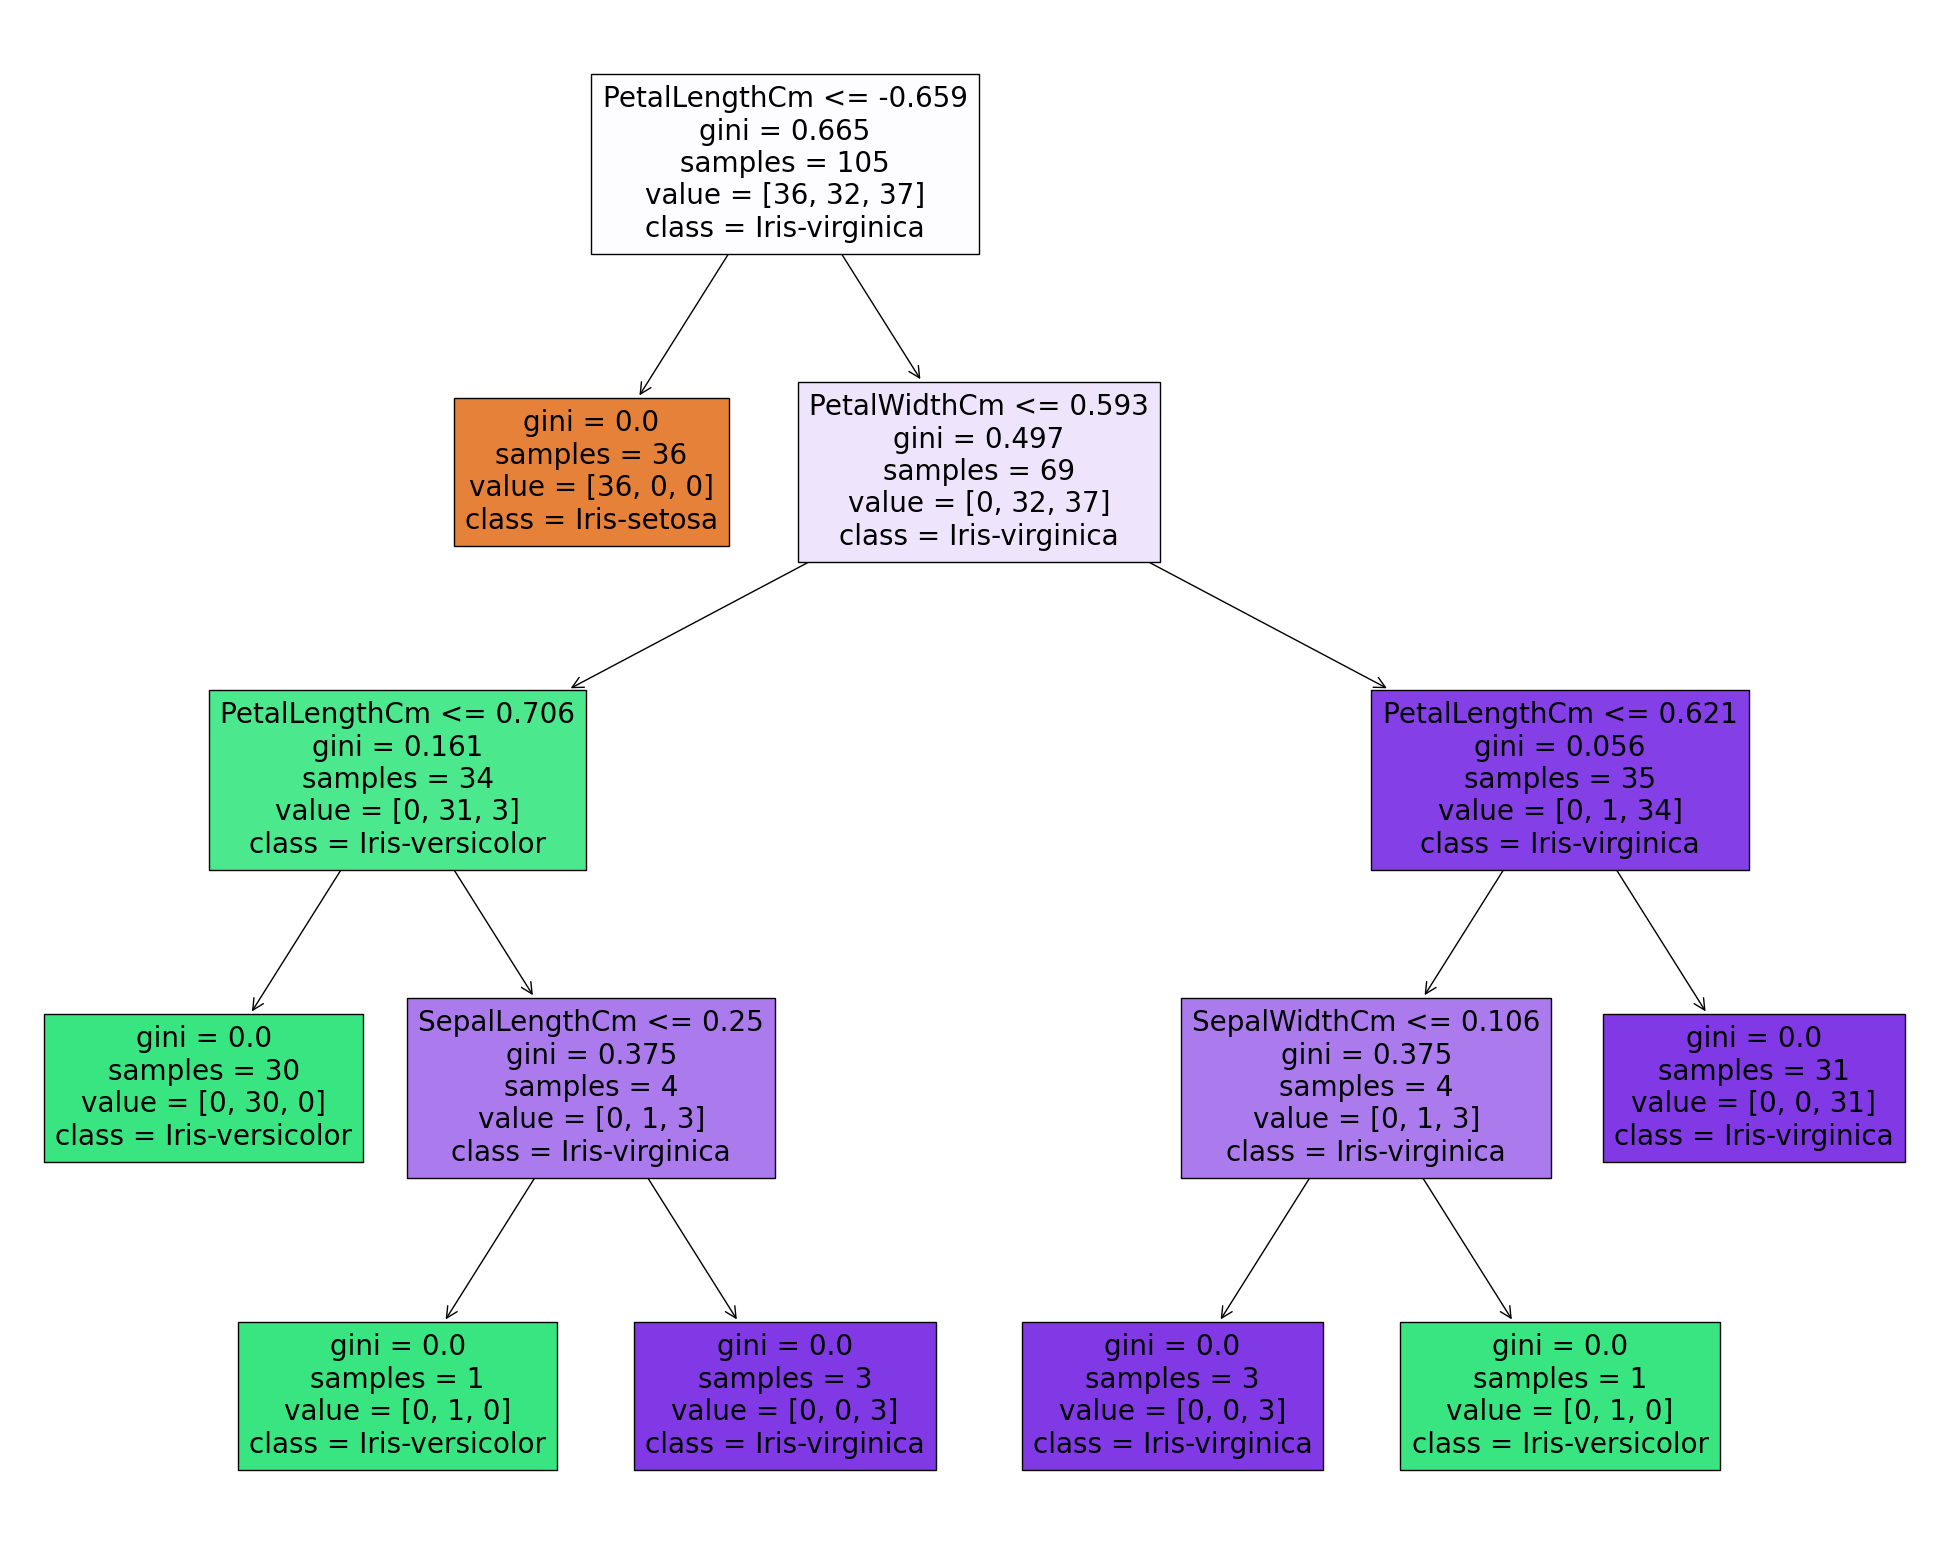

In [27]:
col = data.columns.tolist()
lst = data['Species'].unique().tolist()

fig = plt.figure(figsize=(25, 20))
plot_tree(model, feature_names = col, class_names = lst, filled = True)